# 利用相位反冲构建量子锁

前言
---------

在本文中，我们将探索量子相位反冲（phase kickback）的概念。这一概念在许多量子算法中都有应用，如Deutsch-Jozsa算法和量子相位估计算法。在本教程中，我们将利用相位反冲构建一个"量子锁"。准备好进入量子世界，学习如何创建一个牢不可破的锁了吗？让我们开始吧！

量子相位反冲简介
---------

量子相位反冲是一种强大的量子现象，它利用量子纠缠的特性，将相位信息从目标寄存器传递到控制量子比特。这一现象在许多量子算法的设计中扮演着至关重要的角色。

在相位反冲线路中，我们先用Hadamard门将一个辅助量子比特制备成叠加态，使其作为控制比特。然后对目标寄存器施加一个受控幺正门。当目标寄存器处于幺正门的本征态时，相应本征值的相位会"反冲"到控制比特上。最后再对辅助量子比特施加一个Hadamard门，通过测量就能提取出相位信息。

构建量子锁
-----

现在，让我们来创建宇宙中最强大的锁——"量子锁"！我们用幺正矩阵 $U$ 来表示这个锁，除了一个特定的本征值为-1外，其余本征值均为1。我们将那个特殊的-1本征态称为"钥匙"态： 

$$U|\text{key}\rangle = -|\text{key}\rangle$$

但是，当信息隐藏在相位中时，我们如何区分"钥匙"态和其他本征态呢？这就是相位反冲发挥作用的地方！当输入正确的本征态时，由 $U$ 引入的-1相位会反冲到辅助比特上，使其状态从 $|+\rangle$ 变为 $|-\rangle$ 。此时，对控制比特的测量结果就能告诉我们输入态是否为正确的本征态。在这里， $|1\rangle = H|-\rangle$ 表示解锁成功， $|0\rangle = H|+\rangle$ 表示解锁失败。

为了简单起见，我们在计算基底下构建量子锁。在这种情况下，钥匙对应于一个二进制编码的整数 $m$，即我们的钥匙本征态:

$$\begin{aligned}
U|n\rangle =
\begin{cases}
  -|n\rangle, & \text{if } n=m \\
  |n\rangle, & \text{if } n\neq m
\end{cases}
\end{aligned}$$

我们来构建这个锁:



c:\Users\HP\.conda\envs\dq\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


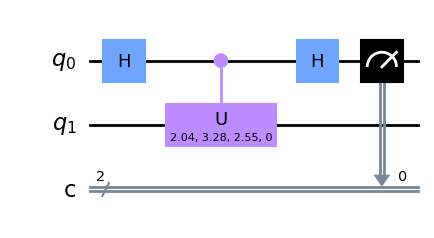

In [44]:
import deepquantum as dq

cir = dq.QubitCircuit(2)

# 加 Hadamard 门
cir.h(0)

# 受控U矩阵
cir.cu(0,1)

# 加 Hadamard 门
cir.h(0)

# 测量
cir.measure(wires=0)

# 绘制图片
cir.draw()

接下来，我们需要根据想要尝试的钥匙来制备相应的本征态。请记住，只有具有-1本征值的"钥匙"态才能打开锁。我们来构建钥匙态:

假设 $U$ 为泡利矩阵 $Z$， $|\text{key}\rangle= \begin{bmatrix} 0 \\ 1 \end{bmatrix}，|\text{incorrect key}\rangle= \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

现在，我们将这些组件组合起来，构建完整的量子锁机制:

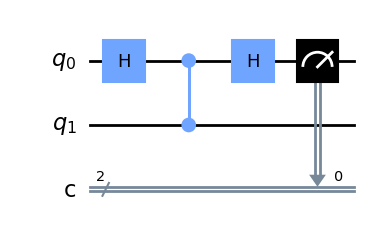

In [45]:
def quantum_locking_mechanism():
    cir = dq.QubitCircuit(2)

    # 加 Hadamard 门
    cir.h(0)

    # 加 CZ 门
    cir.cz(0,1)

    # 加 Hadamard 门
    cir.h(0)

    # 测量
    cir.measure(wires=0)
    return cir

# 绘制图片
cir=quantum_locking_mechanism()
cir.draw()

打开量子锁
----

要打开量子锁，我们需要正确的输入态，即"量子钥匙"。让我们看看当输入正确钥匙时，量子系统如何演化。

首先对控制比特施加Hadamard门：

$$\frac{|0\rangle|\text{key}\rangle + |1\rangle|\text{key}\rangle}{\sqrt{2}}$$

再施加受控幺正门，得到：

$$\frac{|0\rangle|\text{key}\rangle - |1\rangle|\text{key}\rangle}{\sqrt{2}} = |-\rangle|\text{key}\rangle$$

最后，再次对控制比特施加Hadamard门，得到：

$$|1\rangle|\text{key}\rangle$$

就这样，我们解开了量子锁隐藏的秘密。接下来，让我们在代码中实践一下！

In [46]:
def quantum_locking_mechanism():
    cir = dq.QubitCircuit(2)

    # 加 Hadamard 门
    cir.h(0)

    # 受控U矩阵
    cir.cz(0,1)

    # 加 Hadamard 门
    cir.h(0)

    # 测量
    cir.measure()
    return cir

cir=quantum_locking_mechanism()
cir()

tensor([[1.0000+0.j],
        [0.0000+0.j],
        [0.0000+0.j],
        [0.0000+0.j]])

使用错误钥匙会怎样?
----------

现在，我们尝试使用错误的钥匙，看看能否打开量子锁。我们能突破它的量子防御吗？让我们看看输入错误钥匙时，量子系统会如何演化。

首先对控制比特施加Hadamard门：

$$\frac{|0\rangle|\text{incorrect key}\rangle + |1\rangle|\text{incorrect key}\rangle}{\sqrt{2}}$$

在这种情况下，受控幺正门相当于单位门，因此我们得到：

$$\frac{|0\rangle|\text{incorrect key}\rangle + |1\rangle|\text{incorrect key}\rangle}{\sqrt{2}} = |+\rangle|\text{incorrect key}\rangle$$

最后，再次对控制比特施加Hadamard门，得到：

$$|0\rangle|\text{incorrect key}\rangle$$

如你所见，我们无法欺骗这个强大的锁。

In [47]:
def quantum_locking_mechanism():
    cir = dq.QubitCircuit(2)

    cir.x(1)

    # 加 Hadamard 门
    cir.h(0)

    # 受控U矩阵
    cir.cz(0,1)

    # 加 Hadamard 门
    cir.h(0)

    # 测量
    cir.measure()
    return cir

cir=quantum_locking_mechanism()
cir()

tensor([[0.0000+0.j],
        [0.0000+0.j],
        [0.0000+0.j],
        [1.0000+0.j]])

结论
--

你已经成功探索了非凡的相位反冲现象，并创造了一个牢不可破的"量子锁"。